In [91]:
#imports 
import numpy as np
import pandas as pd
import gzip
from matplotlib import pyplot as plt

# Loading the data

### Training data

#### *Data loading*

In [92]:
# Importing training data
f = gzip.open("./Data/train-images-idx3-ubyte.gz", "r")
# defining the number of images and the number of pixels
image_size = 28
num_imgs = 60000
# reading every string literal in the file and assigning it to buf
f.read(16)
buf = f.read(num_imgs * image_size * image_size)
# Convert each literal/ string to the float and assign it to the x_train
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# Reshaping the Training data suitable for learning
X_train = X_train.reshape(num_imgs, image_size, image_size, 1)
print(X_train.shape)


(60000, 28, 28, 1)


#### *Label loading*

In [151]:
# Importing training labels
f = gzip.open("./Data/train-labels-idx1-ubyte.gz","rb")
# reading every string literal in the file and assigning it to buf
# Convert each literal/ string to the float and assign it to the x_train
y_train = []
#reason for the statement below is that the data in the files start after 8 literals from the original file
buf = f.read(8)
for i in range(60000-8):
    buf = f.read(1)
    # print(buf)
    ind_label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    y_train.append(ind_label[0])
y_train = np.asarray(y_train)
print(y_train[0:50])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


#### *Checking validity of train data*

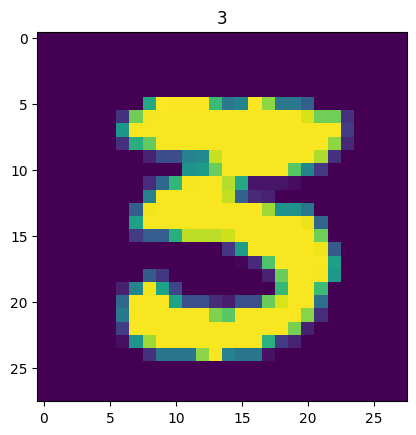

In [153]:
#Testing if the dataset is valid or not
image =  np.asarray(X_train[2200]).squeeze()
# image =  X_train[0].reshape(image_size, image_size)
# print(image)
plt.imshow(image)
plt.title(y_train[2200])
plt.show()
# Test Acurate for training Data

# Loading Testing Data

In [179]:
#Loading Testing data
f = gzip.open("./Data/t10k-images-idx3-ubyte.gz", "rb")
test_num_imgs = 10000
f.read(16)
buf = f.read(test_num_imgs * image_size * image_size)
X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_test.reshape(test_num_imgs, image_size, image_size, 1)
#Loading Testing Labels data
f = gzip.open("./Data/t10k-labels-idx1-ubyte.gz", "rb")
f.read(8)
buf = f.read(10000-8)
y_test = np.frombuffer(buf, dtype=np.uint8)
print(y_test)

[7 2 1 ... 6 7 8]


#### *Checking validity of Test data*

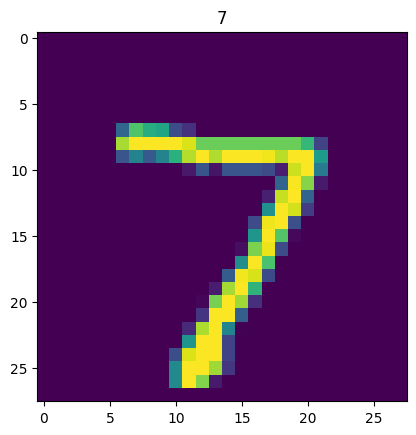

In [181]:
# Test validity for testing Data
image = X_test[0].squeeze()
plt.imshow(image)
plt.title(y_test[0])
plt.show()